In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Interactive Graphics Example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint

SIRInit = [700, 400, 100]
t = np.linspace(0,350,1000)

def SIR(X,t, beta,gamma):
    S, I, R = X
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]

def SIRSolver(beta,gamma):
    sol = odeint(SIR,SIRInit,t,args=(beta, gamma))
    S,I,R = sol.T # instead of: S,I,R = sol[:, 0], sol[:, 1], sol[:, 2]

    print("\tbeta \t=\t %8.4f\n\tgamma \t=\t %8.4f" % (beta,gamma))
    plt.plot(t, S, 'b', linestyle='dotted', alpha=0.5, lw=2, label='S = susceptible')
    plt.plot(t, I, 'r', linestyle='solid', alpha=0.5, lw=2, label='I = infected')
    plt.plot(t, R, 'g', linestyle='dashed', alpha=0.5, lw=2, label='R = recovered')
    plt.xlabel(r'$t\;/\mathrm{s}$')
    plt.ylabel('population size')   
    plt.title('SIR')
    plt.grid(True) 
    plt.legend(loc='best')
    plt.show()

interact(SIRSolver, beta=(0.000025, 0.0005, 0.000025),gamma=(0.005,0.01,0.001));

interactive(children=(FloatSlider(value=0.00025, description='beta', max=0.0005, min=2.5e-05, step=2.5e-05), F…

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib.widgets import Button
import matplotlib.widgets
from scipy.integrate import odeint

# see: also https://de.wikipedia.org/wiki/SIR-Modell
# Population Size in Germany
N = 80000000 

#  Initial Values
Infected0, Recovered0 = 1, 0 
Susceptible0 = N - Infected0 - Recovered0

SIRInit = [Susceptible0, Infected0, Recovered0]
t = np.linspace(0, 80, 81) # time in days

def SIR(X,t, N,beta,gamma):
    S, I, R = X
    dSdt = -beta * S * I / N
    dRdt = gamma * I
    dIdt= beta * S/N * I - gamma * I
    return [dSdt, dIdt, dRdt]

def SIRSolver(beta,gamma):
    sol = odeint(SIR,SIRInit,t,args=(N,beta, gamma))
    S,I,R = sol.T # or sol[:, 0], sol[:, 1], sol[:, 2]
    print("\tbeta \t=\t %8.2f\n\tgamma \t=\t %8.2f" % (beta,gamma))

    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    
    ax.plot(t, I/N, 'r', linestyle='solid', alpha=0.7, lw=2, label='I = infected')
    ax.plot(t, S/N, 'b', linestyle='dotted', alpha=0.7, lw=2, label='S = susceptible')
    ax.plot(t, R/N, 'g', linestyle='dashed', alpha=0.7, lw=2, label='R = recovered')

    fig.suptitle('SIR Model (Covid-19 Pandemic)', fontsize=15)
    ax.set_xlabel('Time (in days)')
    ax.set_ylabel('Part of the population')
    ax.set_ylim(0,1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(True, which='major', c='k', lw=1.5, ls='--', alpha=0.3)
    legend = ax.legend()
    legend.get_frame().set_alpha(0.75)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

interact(SIRSolver, beta=(0.8, 1.0, 0.05),gamma=(0.3,0.5,0.1));

# beta = contact rate
# gamma = 1./meantime to recover in 1/days

interactive(children=(FloatSlider(value=0.8500000000000001, description='beta', max=1.0, min=0.8, step=0.05), …

# ChatGPT Problem

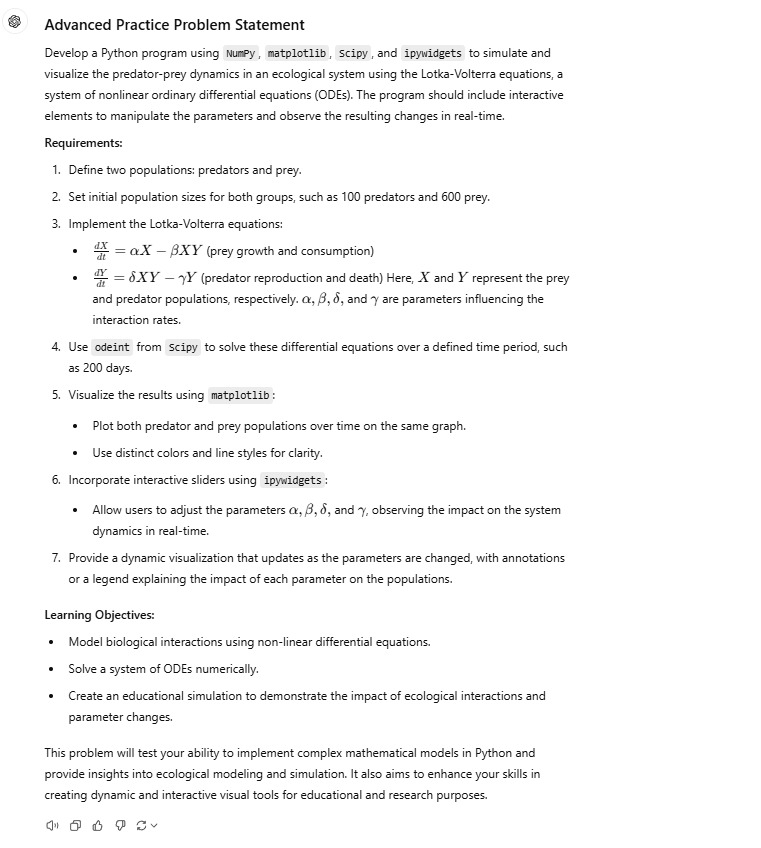

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# init values and time
PredPreyInit = [100, 600]
t = np.linspace(0, 200, 401)

# define func
def LotkaVolterra(X, t, alpha, beta, gamma, delta):
    pred, prey = X

    dpreydt = alpha*prey - beta*prey*pred
    dpreddt = delta*prey*pred - gamma*pred

    return [dpreddt, dpreydt]

def simulator(alpha, beta, gamma, delta):
    # solve
    sol = odeint(LotkaVolterra, PredPreyInit, t, args=(alpha, beta, gamma, delta))
    pred, prey = sol.T

    print("\talpha \t=\t %.4f\n\tbeta \t=\t %.4f\n\tgamma \t=\t %.4f\n\tdelta \t=\t %.4f" % (alpha, beta, gamma, delta))
    
    plt.figure(figsize=(15,6))

    # population plot
    plt.subplot(1, 2, 1)
    plt.plot(t, pred, 'r-', label='predator')
    plt.plot(t, prey, 'g--', label='prey')
    plt.title('Predator-Prey Population Graph')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.legend(loc='best')
    plt.grid()

    # phase plot
    plt.subplot(1, 2, 2)
    plt.plot(prey, pred, 'b--')
    plt.title('Phase Diagram')
    plt.xlabel('Prey Population')
    plt.ylabel('Predator Population')
    plt.grid()

    plt.show()


# call interact
interact(simulator,
        alpha=(0.01, 0.1, 0.01),
        beta=(0.001, 0.005, 0.0005),
        gamma=(0.1, 0.3 , 0.01),
        delta=(0.001, 0.005, 0.0005));

interactive(children=(FloatSlider(value=0.05, description='alpha', max=0.1, min=0.01, step=0.01), FloatSlider(…

# Path of a ball example code

In [28]:
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.constants import g

TrajectoryInit = [0,10,0,5,25,40]
t = np.linspace(0,6,100)

def Trajectory(X,t,m,delta):
    
    x,y,z, vx, vy, vz = X
    
    dxdt, dydt, dzdt = vx, vy, vz
    dvxdt, dvydt, dvzdt = -delta/m*vx, -delta/m*vy, -delta/m*vz-g
   
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt ]


def TrajectorySolver(m,delta):
    sol = odeint(Trajectory,TrajectoryInit,t,args=(m, delta))
    print("\tm \t=\t %8.2f\n\tdelta \t=\t %8.2f" % (m,delta))
    xcoordinate, ycoordinate, zcoordinate, vx, vy, vz = sol.T 

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xcoordinate, ycoordinate, zcoordinate, label='Flight of Ball')
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('height [m]') 
    ax.set_zlim(0,70)
    plt.title('Path of a Ball')
    plt.grid() 
    plt.legend(loc='best')
    plt.show()

interact(TrajectorySolver, m=(0.1, 10, 0.05),delta=(0.01,1.5,0.01));

interactive(children=(FloatSlider(value=5.05, description='m', max=10.0, min=0.1, step=0.05), FloatSlider(valu…